## **Project Title:**

Comprehensive Analysis of Climate Trends and Environmental Changes

## **Project Objectives:**
- Analyze historical temperature data to identify long-term trends and seasonal fluctuations.

- Investigate the relationship between carbon dioxide emissions and key climate indicators, including temperature and precipitation.

- Analyze changes in sea levels across different regions to assess potential environmental and socio-economic impacts.

- Compare climate trends across different locations and countries to highlight regional disparities and vulnerabilities.

## Importing Libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline


In [15]:
# Importing the climate dataset
df = pd.read_csv(r"C:\Users\ISMAIL\Desktop\Climate Insights Dataset analysis\climate_change_data.csv")

## Exploratory Data Analysis

In [16]:
# Viewing the toop five rows of the data

df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [17]:
# Checking the columns in the data

df.columns

Index(['Date', 'Location', 'Country', 'Temperature', 'CO2 Emissions',
       'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed'],
      dtype='object')

In [18]:
# Checking the number of null values in each column

df.isnull().sum()

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

In [19]:
# Checking for duplicates in the data

df.duplicated().sum() # Thhere are no duplicates in the data

np.int64(0)

In [20]:
# Checking the number of unique values in each column
'''
There are 243 countries
7764 locations
'''
df.nunique()    

Date              10000
Location           7764
Country             243
Temperature       10000
CO2 Emissions     10000
Sea Level Rise    10000
Precipitation     10000
Humidity          10000
Wind Speed        10000
dtype: int64

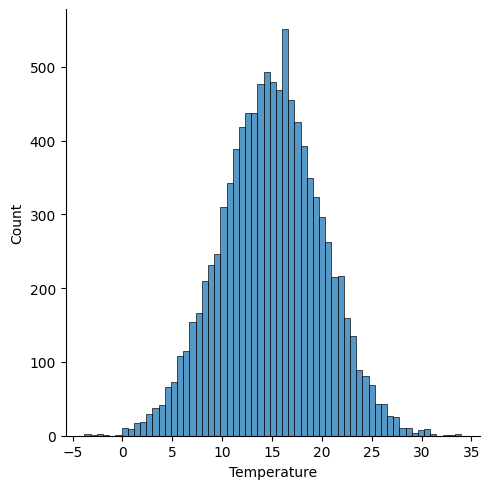

In [21]:
# Ckecking for outliers using the temperature column
sns.displot(df['Temperature'])


In [22]:
# General information about the dataset
df.info()     


# The date Dtype needs to be changed to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.3+ KB


In [23]:
# General statistics about the dataset
df.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.936034,400.220469,-0.003152,49.881208,49.771302,25.082066
std,5.030616,49.696933,0.991349,28.862417,28.929320,14.466648
min,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732
25%,11.577991,367.109330,-0.673809,24.497516,24.713250,12.539733
50%,14.981136,400.821324,0.002332,49.818967,49.678412,24.910787
75%,18.305826,433.307905,0.675723,74.524991,75.206390,37.670260
max,33.976956,582.899701,4.116559,99.991900,99.959665,49.997664


## Data Cleaning

In [24]:
# Converting the data type of the to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            10000 non-null  datetime64[ns]
 1   Location        10000 non-null  object        
 2   Country         10000 non-null  object        
 3   Temperature     10000 non-null  float64       
 4   CO2 Emissions   10000 non-null  float64       
 5   Sea Level Rise  10000 non-null  float64       
 6   Precipitation   10000 non-null  float64       
 7   Humidity        10000 non-null  float64       
 8   Wind Speed      10000 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 703.3+ KB


## Analysis

1. Analyze historical temperature data to identify long-term trends and seasonal fluctuations.

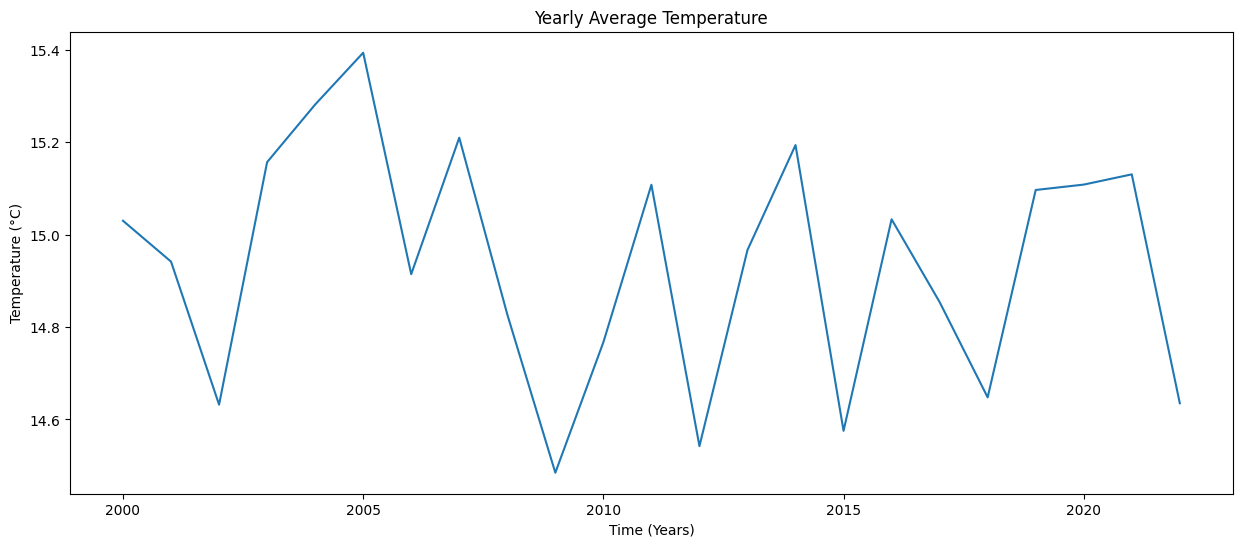

In [131]:
df['Year'] = df['Date'].dt.year

fig1, ax= plt.subplots(figsize=(15, 6))

(df.groupby('Year')['Temperature'].mean()
 .plot(kind='line', title='Yearly Average Temperature',xlabel='Time (Years)', ylabel='Temperature (°C)', ax=ax)
)

plt.show()



2. Investigate the relationship between carbon dioxide emissions and key climate indicators, including temperature and precipitation.

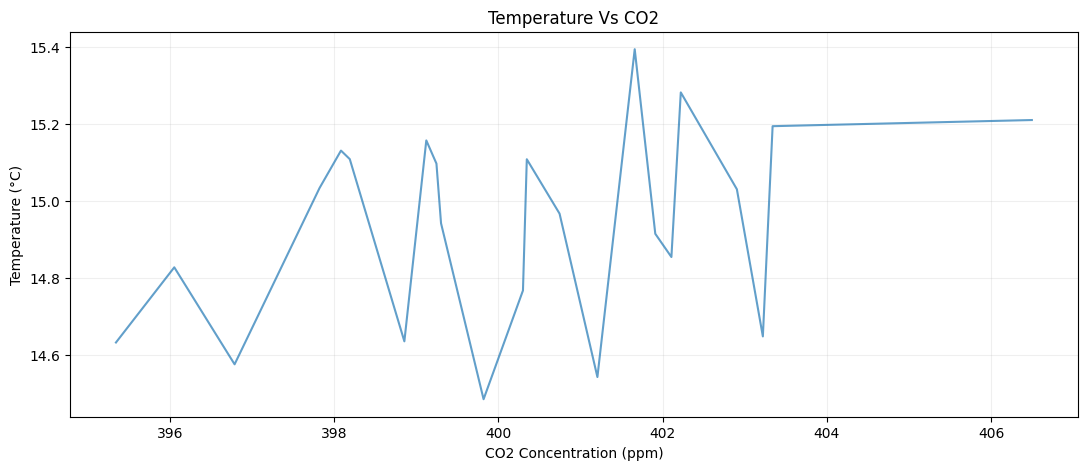

In [132]:
df['Month'] = df['Date'].dt.month_name()
df_ct = df.groupby('Year')[['CO2 Emissions', 'Temperature']].mean()

df['Month'] = df['Date'].dt.month_name()
df_ct = df.groupby('Year')[['CO2 Emissions', 'Temperature']].mean()

df_ct = df_ct.reset_index(drop=True).sort_values(by='CO2 Emissions',ascending=True)



fig, ax = plt.subplots(figsize=(13, 5))
ax.plot(df_ct['CO2 Emissions'], df_ct['Temperature'], alpha=0.7 )
plt.xlabel('CO2 Concentration (ppm)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Vs CO2')
plt.grid(alpha=0.2)

plt.show()


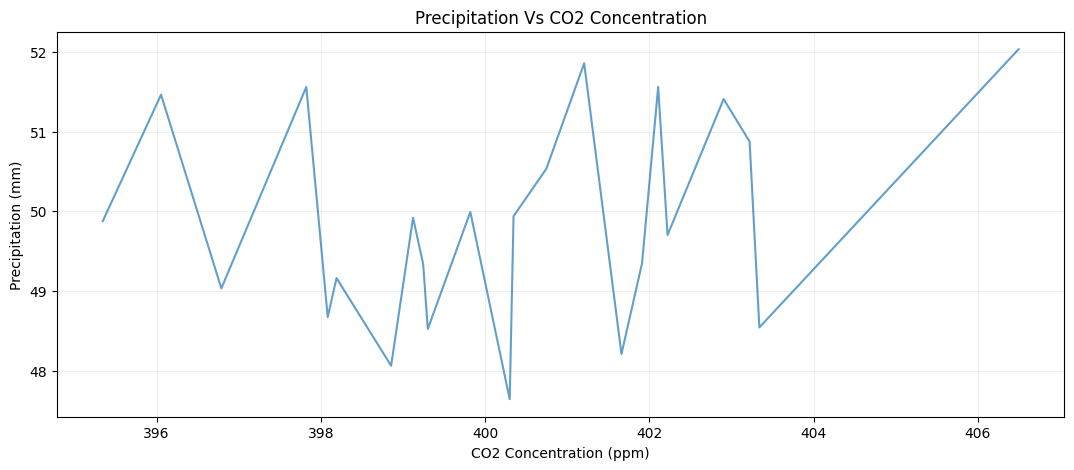

In [134]:

df['Month'] = df['Date'].dt.month_name()
df_ct = df.groupby('Year')[['CO2 Emissions', 'Temperature', 'Precipitation']].mean()

df_ct = df_ct.reset_index(drop=True).sort_values(by='CO2 Emissions',ascending=True)

fig, ax = plt.subplots(figsize=(13, 5))
ax.plot(df_ct['CO2 Emissions'], df_ct['Precipitation'], alpha=0.7, )
plt.xlabel('CO2 Concentration (ppm)')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation Vs CO2 Concentration')
plt.grid(alpha=0.2)

plt.show()

3. Analyze changes in sea levels across different regions to assess potential environmental and socio-economic impacts.


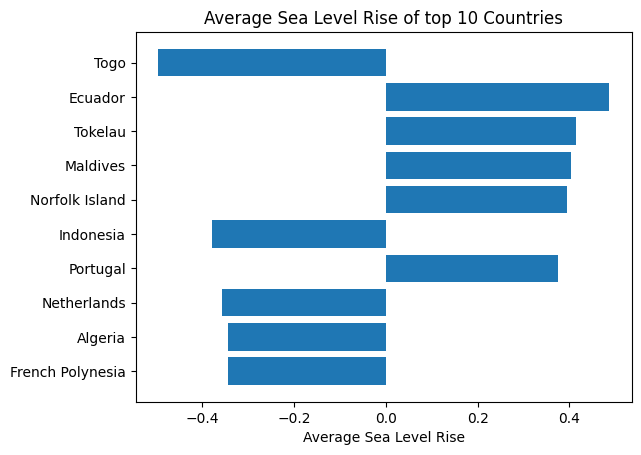

<Figure size 640x480 with 0 Axes>

In [175]:
df_sea = (df.groupby('Country')['Sea Level Rise'].mean()
          .sort_values(key=abs, ascending=False)
          .reset_index()
          .head(10)
          .sort_index(ascending=False)
        
          )
plt.barh(df_sea['Country'], df_sea['Sea Level Rise'])


plt.xlabel('Average Sea Level Rise')
plt.title('Average Sea Level Rise of top 10 Countries')

plt.show()

plt.savefig(
    "Sea levels of top 10 Countries.png",          # File name
    dpi=300,                # High resolution
    bbox_inches='tight',    # Remove extra whitespace
    
    format="png"            # File format
)



4. Compare climate trends across different locations and countries to highlight regional disparities and vulnerabilities.

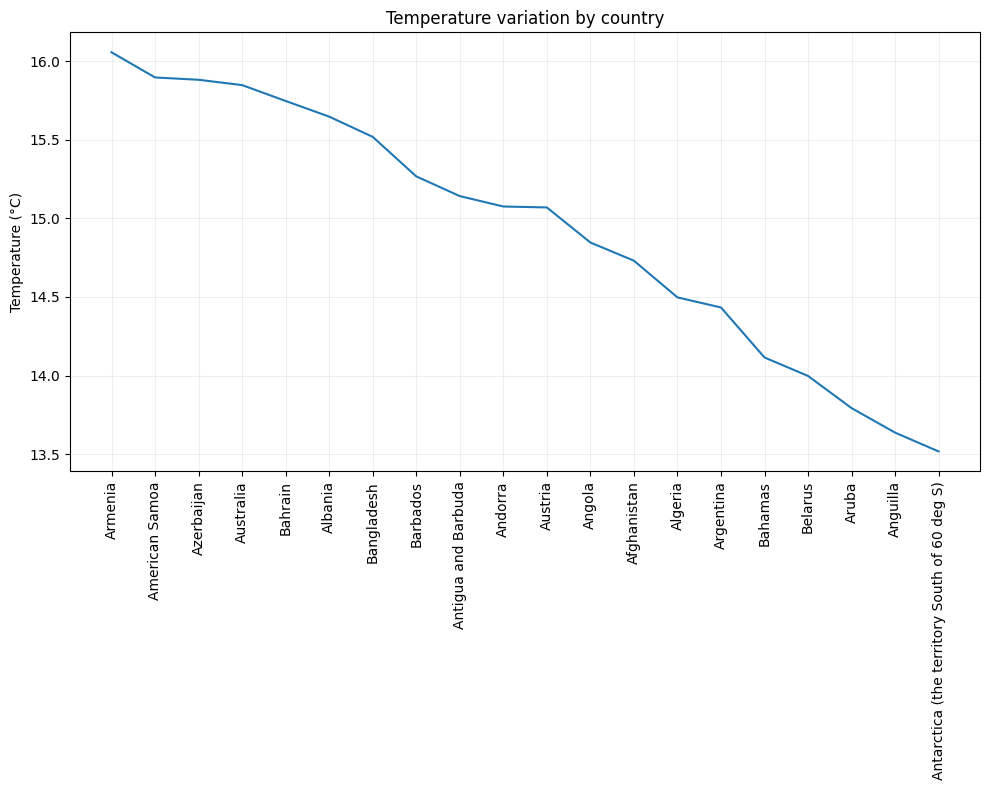

In [170]:
df_trends = (df.iloc[:,2:9].groupby('Country').mean()
              .head(20)
              .reset_index()
              .sort_index()
              .sort_values(by='Temperature', ascending=False)
              )
plt.figure(figsize=(10,8))
plt.plot(df_trends['Country'], df_trends['Temperature'])
plt.xticks(rotation=90)
plt.grid(True, alpha=0.2)
plt.ylabel('Temperature (°C)')
plt.title('Temperature variation by country')
plt.tight_layout()
plt.show()

 